## IMPORT DES LIBRAIRIES ET DONNEES

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

df_base = pd.read_csv('data.csv')
df = df_base.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    7545 non-null   object 
 13  historique_credits     4692 non-null   float64
 14  risque_personnel       10000 non-null  float64
 15  dat

<Axes: >

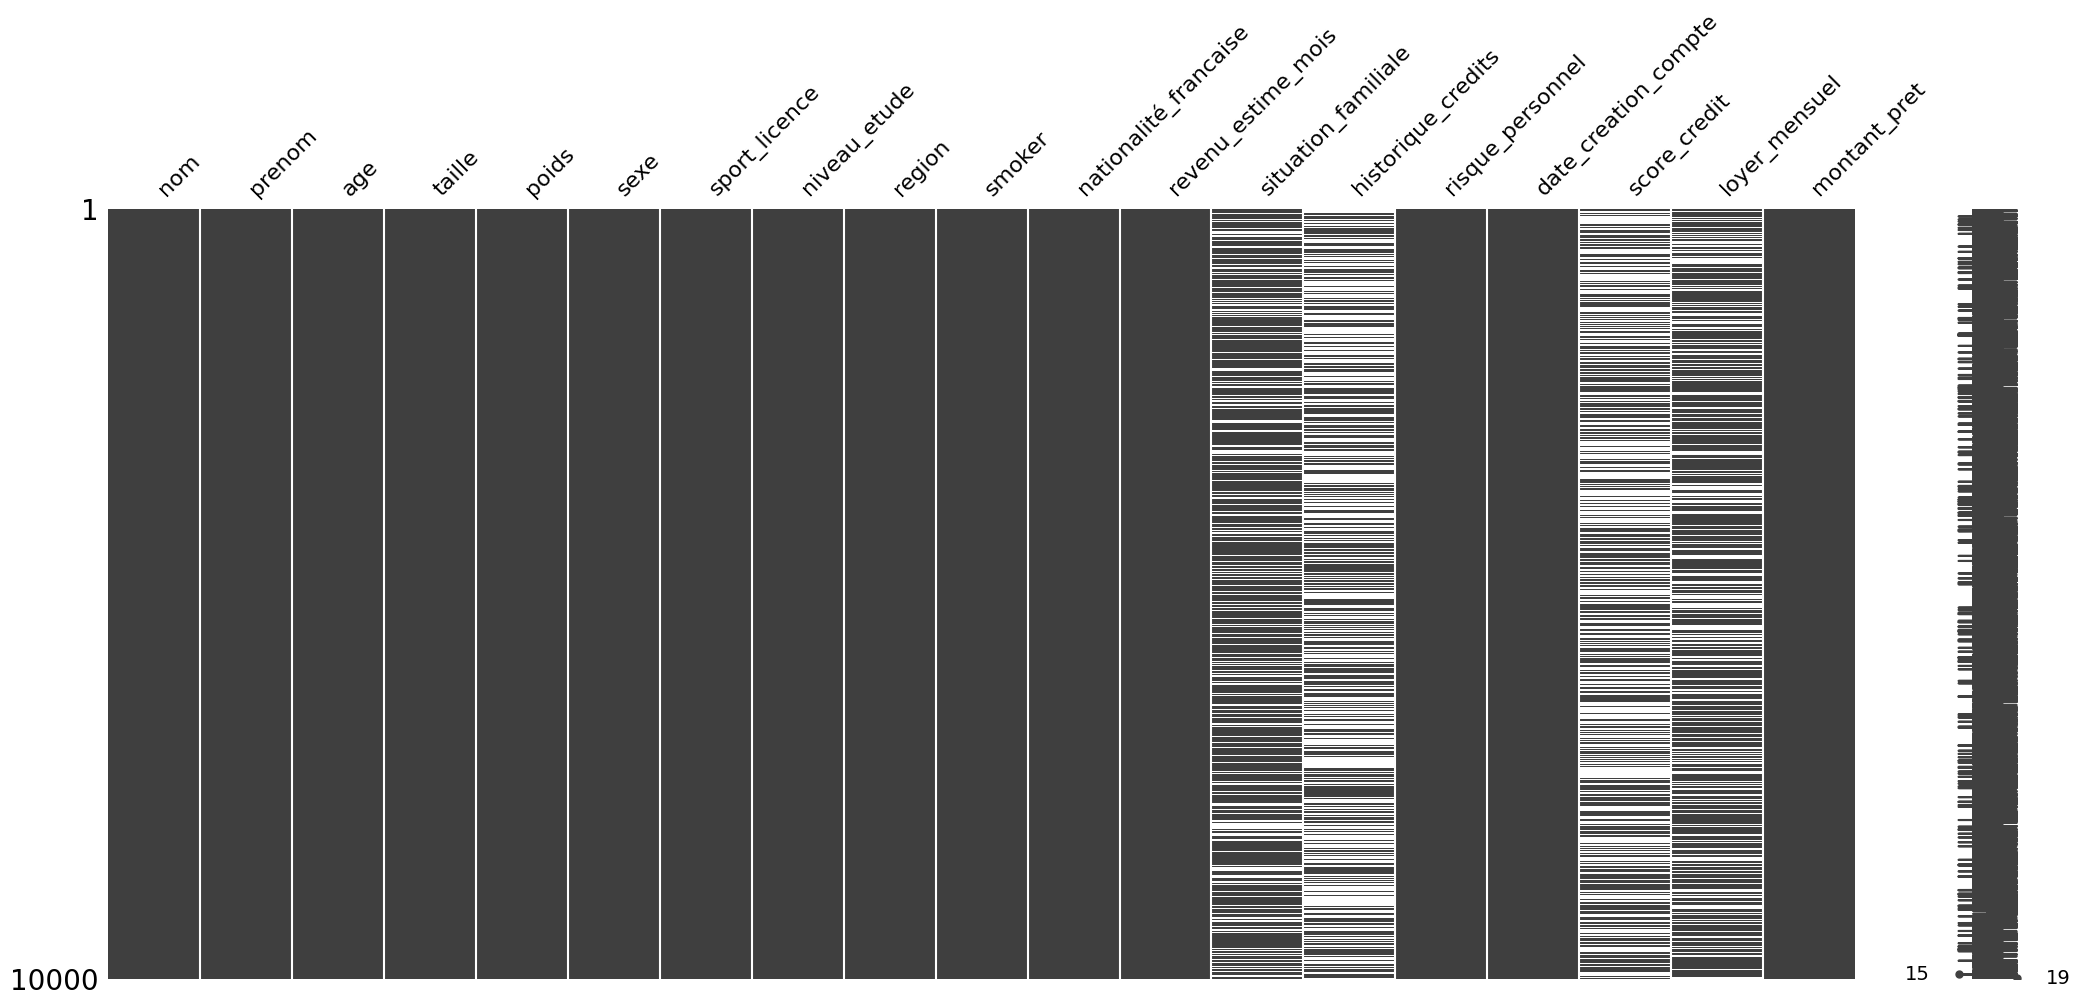

In [32]:
# INFO AVANT TRAITEMENT
df_base.info()
df_base.describe()

# Visualisation des valeurs manquantes
msno.matrix(df_base)

### Supprimer les doublons

In [33]:
nb_doublons = df.duplicated().sum()
print("Nombre de doublons détectés :", nb_doublons)
if nb_doublons > 0:
    df = df.drop_duplicates()

Nombre de doublons détectés : 0


### Normalisation des noms de colonnes

In [34]:
df = df.rename(columns={
    'nationalité_francaise': 'nationalite_francaise'
})
df.columns

Index(['nom', 'prenom', 'age', 'taille', 'poids', 'sexe', 'sport_licence',
       'niveau_etude', 'region', 'smoker', 'nationalite_francaise',
       'revenu_estime_mois', 'situation_familiale', 'historique_credits',
       'risque_personnel', 'date_creation_compte', 'score_credit',
       'loyer_mensuel', 'montant_pret'],
      dtype='object')

### Conversion des colonnes boolean

In [35]:
def to_bool(x):
    if pd.isna(x):
        return False
    s = str(x).strip().lower()
    return s in {"1", "oui"}

for col in ["sport_licence", "smoker", "nationalite_francaise"]:
        if col in df.columns:
            df[col] = df[col].apply(to_bool)

### Conversion des colonnes numeriques

In [36]:
numeric_cols = [
    'age', 'taille', 'poids', 'revenu_estime_mois', 'historique_credits',
    'risque_personnel', 'score_credit', 'loyer_mensuel', 'montant_pret'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[numeric_cols].describe(include='all')

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.00000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000
mean,46.678800,169.98452,69.864350,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078
std,16.669812,9.88310,14.808592,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081
min,18.000000,129.80000,11.700000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000
25%,32.000000,163.40000,59.700000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000
50%,47.000000,170.00000,69.800000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057
75%,61.000000,176.60000,80.000000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527
max,75.000000,208.40000,132.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000


#### Histogrammes permettant de voir si les colonnes numériques ont des valeurs plausibles

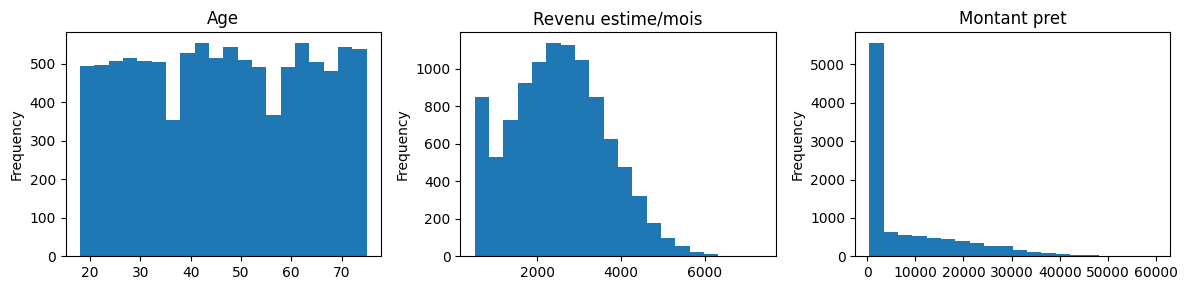

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
df['age'].plot(kind='hist', bins=20, ax=axes[0], title='Age')
df['revenu_estime_mois'].plot(kind='hist', bins=20, ax=axes[1], title='Revenu estime/mois')
df['montant_pret'].plot(kind='hist', bins=20, ax=axes[2], title='Montant pret')
plt.tight_layout()
plt.show()


### Conversion des dates

In [38]:
df['date_creation_compte'] = pd.to_datetime(df['date_creation_compte'], errors='coerce')
df['date_creation_compte'].head()

0   2021-04-04
1   2023-03-19
2   2024-08-27
3   2022-03-18
4   2020-10-17
Name: date_creation_compte, dtype: datetime64[ns]

#### Check dates

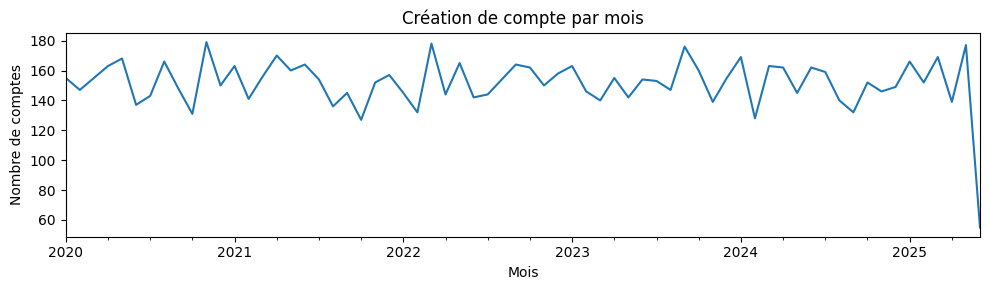

In [39]:
date_counts = df['date_creation_compte'].dt.to_period('M').value_counts().sort_index()
ax = date_counts.plot(kind='line', figsize=(10, 3), title='Création de compte par mois')
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de comptes')
plt.tight_layout()
plt.show()

### Valeurs manquantes

In [40]:
df['historique_credits'] = df['historique_credits'].fillna(0)
df['situation_familiale'] = df['situation_familiale'].replace('', np.nan)
df.isna().sum().sort_values(ascending=False)

score_credit             5256
loyer_mensuel            2971
situation_familiale      2455
age                         0
prenom                      0
nom                         0
taille                      0
niveau_etude                0
poids                       0
sexe                        0
sport_licence               0
nationalite_francaise       0
smoker                      0
region                      0
revenu_estime_mois          0
risque_personnel            0
historique_credits          0
date_creation_compte        0
montant_pret                0
dtype: int64

#### Compare valeurs manquantes

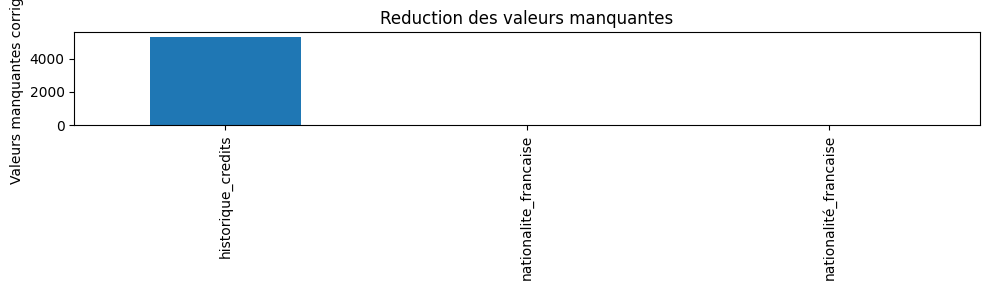

In [41]:
missing_before = df_base.isna().sum()
missing_after = df.isna().sum()
compare = (missing_before - missing_after).sort_values(ascending=False)
compare = compare[compare != 0]
ax = compare.plot(kind='bar', figsize=(10, 3), title='Reduction des valeurs manquantes')
ax.set_ylabel('Valeurs manquantes corrigees')
plt.tight_layout()
plt.show()

### Check valeurs anormales

In [42]:
df[df['loyer_mensuel'] < 0][['nom', 'prenom', 'loyer_mensuel']].head()

,nom,prenom,loyer_mensuel
531,Brown,Mary,-69.31
2246,Gonzales,Steven,-121.75
4032,Clay,Michelle,-1.42
4541,Patton,James,-79.86
4677,Brown,John,-203.03


In [43]:
df[(df['age'] < 18) | (df['age'] > 100)][['nom', 'prenom', 'age']].head()

,nom,prenom,age


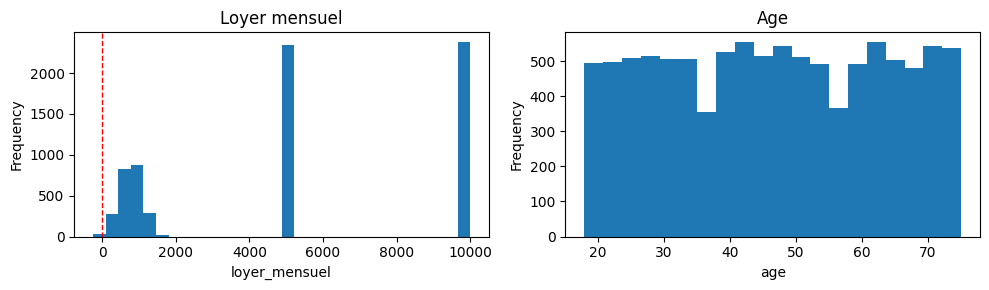

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
df['loyer_mensuel'].plot(kind='hist', bins=30, ax=axes[0], title='Loyer mensuel')
axes[0].axvline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('loyer_mensuel')
df['age'].plot(kind='hist', bins=20, ax=axes[1], title='Age')
axes[1].set_xlabel('age')
plt.tight_layout()
plt.show()

### Export CSV

In [45]:
export_path = "data_cleaned.csv"
df.to_csv(export_path, index=False)
print("Export du fichier nettoyé terminé :", export_path)

Export du fichier nettoyé terminé : data_cleaned.csv
